In [1]:
source("charger.R")
mondata <- charger(2105482)
mondata

,Sales,Price,Advertising,Region
150,4.67,111,0,0
68,12.01,94,0,1
273,9.40,96,17,0
43,5.05,117,0,1
5,6.42,126,5,1
218,8.47,112,0,0
159,10.43,24,0,1
74,11.62,139,4,1
209,6.98,97,0,0
96,7.78,116,3,1


Phase 1:

a)

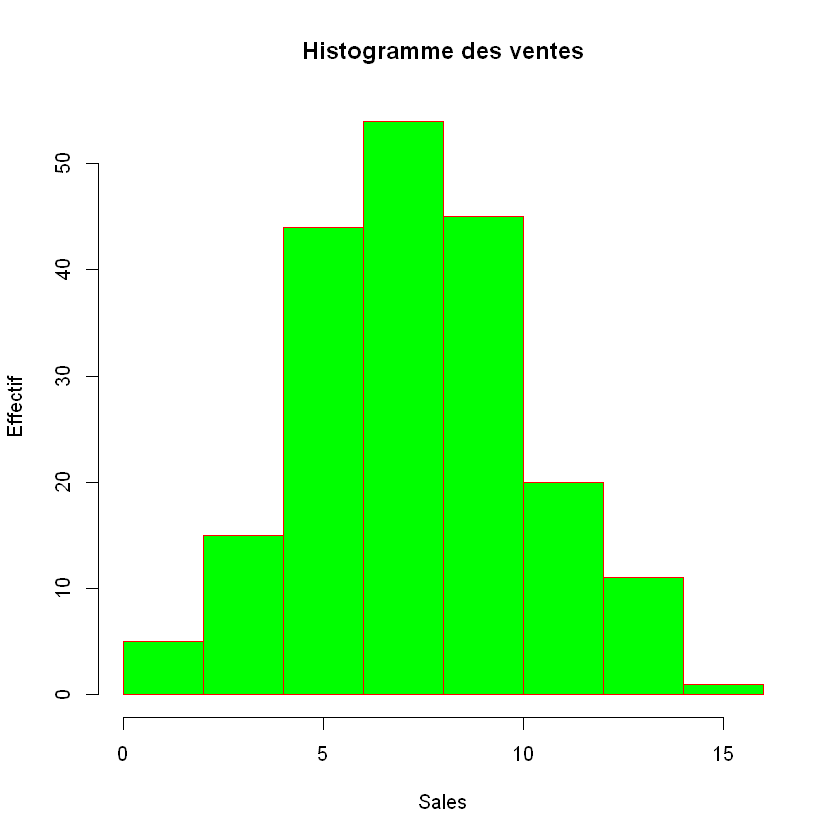

In [2]:
hist(mondata$Sales,col="green",main="Histogramme des ventes", 
     border="red", xlab="Sales",ylab="Effectif")

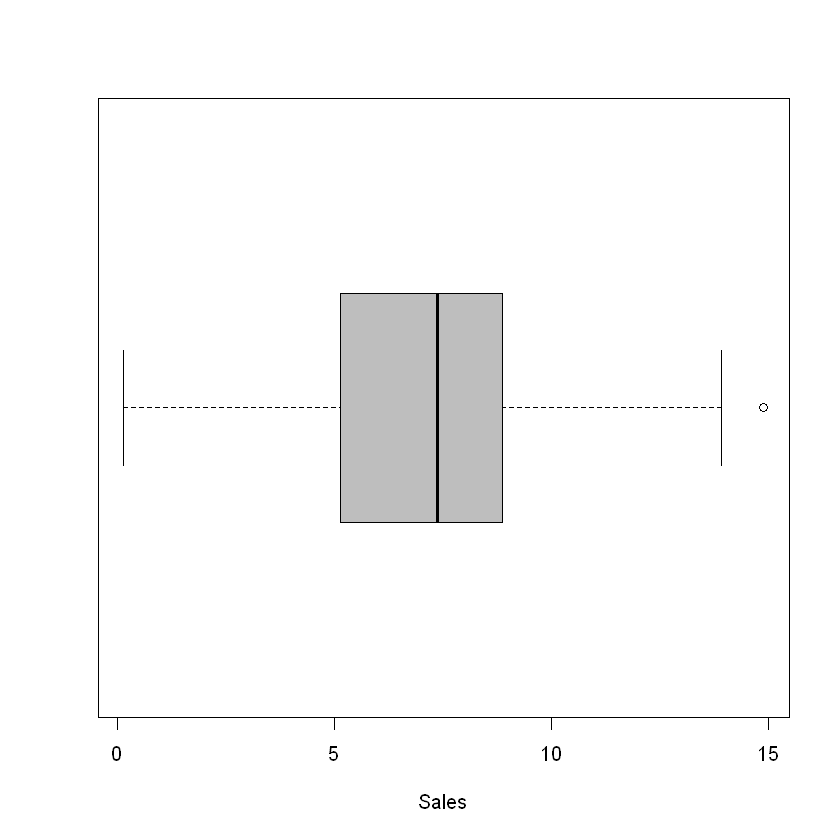

In [3]:
boxplot(mondata$Sales,horizontal=T,col="grey",xlab="Sales")

On observe ici que l’effectif des vente atteint sa plus grande fréquence entre 7 et 8 milles sièges vendus. L’histogramme de ce dernier est plus ou moins semblable à l’allure d’une loi normale.

On voit sur le diagramme de Tukey que la distribution de données est relativement symétrique par rapport à la valeur médiane (environ 5.5 milles sièges). On remarque aussi l’existence d'une valeur extrême (environ 15 milles sièges) vers la droite.

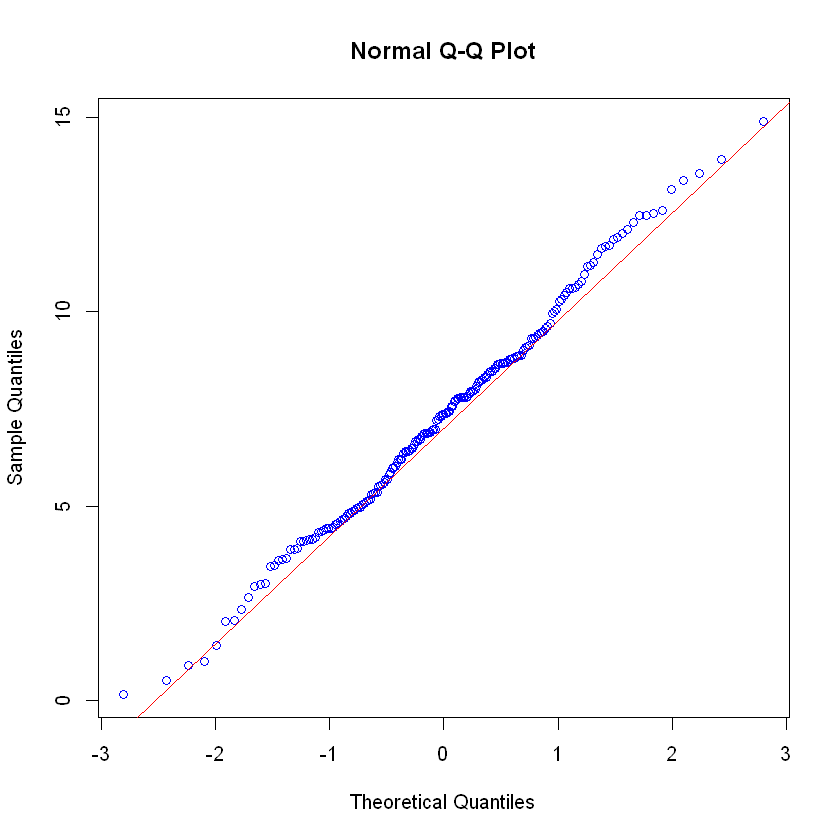

In [4]:
qqnorm(mondata$Sales,col="blue")
qqline(mondata$Sales,col="red")

In [5]:
shapiro.test(mondata$Sales)


	Shapiro-Wilk normality test

data:  mondata$Sales
W = 0.99463, p-value = 0.7128


D'après la droite de Henry et le test de normalité (Shapiro-Wilk), on déduit que la variable Y suit une loi normale.

Premièrement, on remarque que plus on se rapproche du milieu, plus les points ont tendance à être alignés et donc, construire une droite et vers les bornes, on remarque une symétrie dans le dispersement des valeurs. 

Deuxièmement, on a la valeur observée de W est grande (W = 0.99463) et p-value = 0.7128 grande (supérieure a 0.05), alors on accepte H0 qui est l'hypothèse que Y suit une loi normale

In [6]:
statistiques = data.frame(data=c("Sales"), 
                     moyenne=NA, s=NA, q1=NA, mediane=NA,
                     q3=NA, interval=NA)

In [7]:
# moyenne
statistiques$moyenne = mean(mondata$Sales)

# écart-type
statistiques$s = sd(mondata$Sales)

# quantiles q1 et q3
statistiques[1, c("q1", "q3")] = quantile(mondata$Sales, probs = c(0.25,0.75))

#mediane
statistiques$mediane = median(mondata$Sales)

# interval de confiance pour la moyenne
ci <- t.test(mondata$Sales, conf.level = 0.95)$conf.int
statistiques$interval = sprintf("[%f, %f]", ci[1], ci[2])

options(digits=4) 

statistiques

data,moyenne,s,q1,mediane,q3,interval
Sales,7.302,2.826,5.14,7.37,8.88,"[6.902551, 7.700833]"


b)

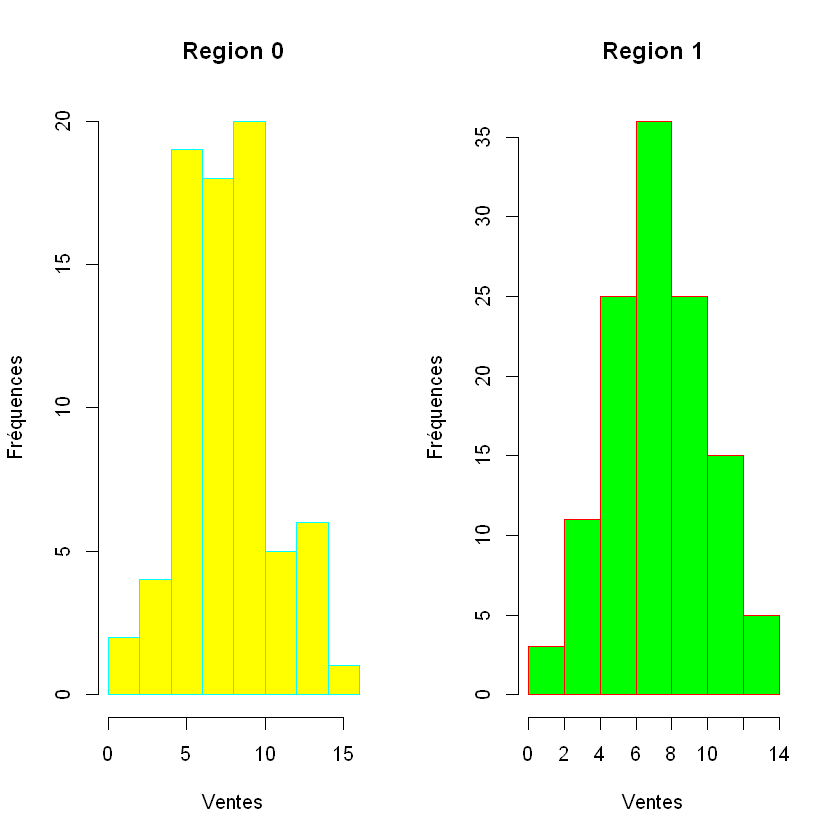

In [8]:
layout(matrix(1:2,1,2))
hist(mondata$Sales[mondata$Region=="0"], col="yellow",border="cyan", 
     main=paste("Region 0"),xlab="Ventes",ylab="Fréquences")
hist(mondata$Sales[mondata$Region=="1"], col="green",border="red", 
     main=paste("Region 1"),xlab="Ventes",ylab="Fréquences")

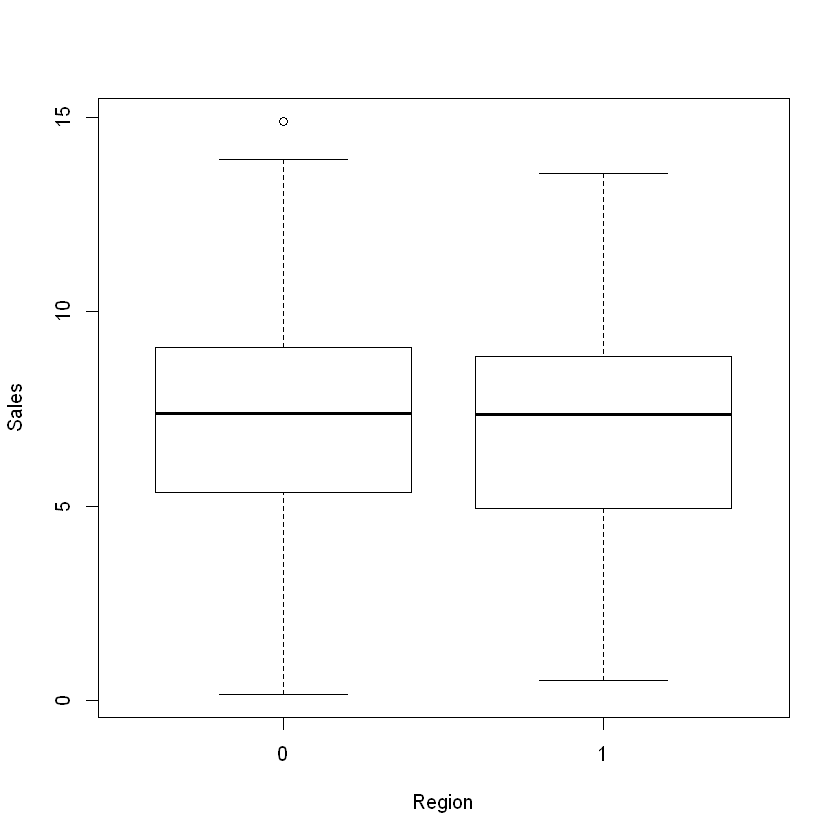

In [9]:
boxplot(Sales~Region, data=mondata)

In [10]:
statistiques = data.frame(ventes=c("Region 0", "Region 1"), 
                     moyenne=NA, s=NA, q1=NA, mediane=NA,
                     q3=NA, interval=NA)

In [11]:
#moyenne
statistiques$moyenne = sapply(0:1, function(i) mean(mondata$Sales[mondata$Region==i]))

# écart-type
statistiques$s = sapply(0:1, function(i) sd(mondata$Sales[mondata$Region==i]))

# mediane
statistiques$mediane = sapply(0:1, function(i) median(mondata$Sales[mondata$Region==i]))

# quantiles q1 et q3
statistiques[1, c("q1", "q3")] = quantile(mondata$Sales[mondata$Region=="0"], probs = c(0.25,0.75))
statistiques[2, c("q1", "q3")] = quantile(mondata$Sales[mondata$Region=="1"], probs = c(0.25,0.75))
                              
# interval de confiance
ci0 <- t.test(mondata$Sales[mondata$Region=="0"], conf.level = 0.95)$conf.int
statistiques[1, c("interval")] = sprintf("[%f, %f]", ci0[1], ci0[2])
                              
ci1 <- t.test(mondata$Sales[mondata$Region=="1"], conf.level = 0.95)$conf.int
statistiques[2, c("interval")] = sprintf("[%f, %f]", ci1[1], ci1[2])

options(digits=4) # Pour limiter le nombre de décimales et 

statistiques

ventes,moyenne,s,q1,mediane,q3,interval
Region 0,7.474,2.926,5.345,7.380,9.095,"[6.800852, 8.147148]"
Region 1,7.194,2.769,4.955,7.365,8.852,"[6.693506, 7.694494]"


-->Test d’hypothèses sur l’égalité des variances pour les deux groupes

In [14]:
rural <- subset(mondata, Region==0)$Sales
urbain <- subset(mondata, Region==1)$Sales
var.test(rural, urbain)


	F test to compare two variances

data:  rural and urbain
F = 1.1, num df = 74, denom df = 119, p-value = 0.6
alternative hypothesis: true ratio of variances is not equal to 1
95 percent confidence interval:
 0.7462 1.7045
sample estimates:
ratio of variances 
             1.117 


Dans ce test, on a les hypothèses: 

H0: V1 = V2 vs H1: V1 != V2 (nb: '!=' signifie "non égale a").

Ici V1 est la variance pour le 1er groupe (Region==0) et V2 est la variance pour le 2eme groupe (Region==1)

On remarque que p-value = 0.6 est supérieure au seuil critique (0.05), alors on ne rejette pas l'hypothèse H0

-->Test d’hypothèses sur l’égalité des moyennes pour les deux groupes

In [15]:
rural <- subset(mondata, Region==0)$Sales
urbain <- subset(mondata, Region==1)$Sales
t.test(rural, urbain)


	Welch Two Sample t-test

data:  rural and urbain
t = 0.66, df = 151, p-value = 0.5
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.5537  1.1137
sample estimates:
mean of x mean of y 
    7.474     7.194 


Dans ce test, on a les hypothèses:

H0: u1 = u2 vs H1: u1 != u2 (nb: '!=' signifie "non égale a")

ici u1 est la moyenne pour le 1er groupe (Region==0) et u2 est la moyenne pour le 2eme groupe (Region==1)

On remarque que p-value = 0.5 est supérieure au seuil critique (0.05), alors on ne rejette pas l'hypothèse H0